**переводим в категориальные данные массово:**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])
df
# 0 - отравлен, 1 - здоров

**переводим 'object' в число**

In [ ]:
# степень угрозы переводим в цифры от 0 до 3, чем больше число, тем выше угроза
df['endangered_code']=np.where(df['endangered']=='least_concern',1,
                     (np.where(df['endangered']=='vulnerable',2,3)))

In [ ]:
# количество ног переводим в цифры, 2 -две ноги, 3 - три ноги
df['specie_code']=np.where(df['specie']=='two_toed',2,3)

In [ ]:
# пеевод подвида ленивца в цифры от 1 до 6
df['sub_specie_code']=np.where(df['sub_specie']=='Hoffman’s two-toed sloth',1,
                (np.where(df['sub_specie']=='Linnaeus’s two-toed sloth',2,
                (np.where(df['sub_specie']=='Pale-throated sloth',3,
                (np.where(df['sub_specie']=='Brown-throated sloth',4,
                (np.where(df['sub_specie']=='Maned three-toed sloth',5,6)))))))))

# **ГОТОВЫЕ ДЛЯ МОДЕЛИ ДАНННЫЕ**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/наборы данных')

In [ ]:
filename='Metro_Interstate_Traffic_Volume.csv'
#names=['area A','perimeter P','compactness','length of ker',
#       'width of ker', 'asymmetry coeff', 'length of ker groove','class']
df=read_csv(filename)#,sep='\t', error_bad_lines=False,names=names)

In [ ]:
#df=df.rename(columns=lambda x: x.replace(' ','_'))

In [ ]:
df.head(4)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026


# 1. **ИЩЕМ и ЧИСТИМ от NaN**

In [ ]:
df.isna().sum()

# **2. МЕНЯЕМ ТИПЫ ДАННЫХ**

In [ ]:
df.holiday.value_counts()

_________________________________________

**для_справок:**

перевод данных в формате **object в** формат **int**(значение прсваивается произвольно):

In [ ]:
df.holiday = pd.Categorical(df.holiday).codes.astype('int')

____________________________________________

**для_справок:**

In [ ]:
ser = pd.Series(['Geeks', 11, 22.7, 33])
ser

0    Geeks
1       11
2     22.7
3       33
dtype: object

In [ ]:
ser = pd.Series(['Geeks', 11, 22.7, 33])

pd.to_numeric(ser, downcast ='signed') #- при использовании downcast = 'Signed' все значения будут преобразованы в целое число(все значения д.б. числовыми).
pd.to_numeric(ser, errors ='ignore') #- Использование ошибок = «игнорировать». Он будет игнорировать все нечисловые значения.
pd.to_numeric(ser, errors ='coerce') #- Использование ошибок = 'принуждение'. Он заменит все нечисловые значения на NaN.
pd.to_numeric(df['pass_info'].str.replace('\D', ''), errors='coerce') # удалит все пробелы в столбце и если в число ктото случайно впечатал буквы, то они
                                                                      # исчезнут и останется чистое число

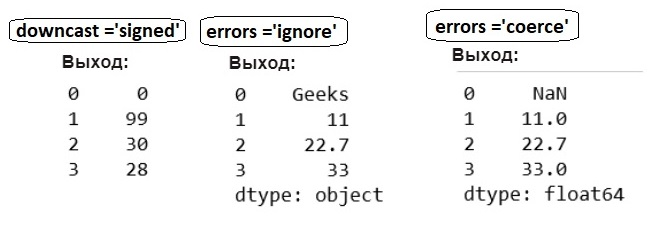

_______________________________________________________________________________

**для_справок:**

**конкретную строку меняем на конкретное число:**

In [ ]:
df['class_name']=np.where(df['class']==1,'Кама',
                (np.where(df['class']==2,'Роза','Канадская')))

_______________________________________________________________

In [ ]:
#df.holiday = df.holiday.astype('int')

In [ ]:
df.dtypes

In [ ]:
df.head(4)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,hour
0,7,288.28,0.0,0.0,40,1,24,2012-10-02 09:00:00,5545,10,9
1,7,289.36,0.0,0.0,75,1,2,2012-10-02 10:00:00,4516,10,10
2,7,289.58,0.0,0.0,90,1,19,2012-10-02 11:00:00,4767,10,11
3,7,290.13,0.0,0.0,90,1,19,2012-10-02 12:00:00,5026,10,12


In [ ]:
df.weather_description.value_counts()

In [ ]:
df.weather_main = pd.Categorical(df.weather_main).codes.astype('int')

In [ ]:
df.weather_description = pd.Categorical(df.weather_description).codes.astype('int')

___________________________________________________________

данные **Дата-Time:**

In [ ]:
pd.Series.dt.year   # возвращает год даты и времени
pd.Series.dt.month  # возвращает месяц даты и времени
pd.Series.dt.day    # возвращает день даты и времени
pd.Series.dt.hour   # возвращает час даты и времени
pd.Series.dt.minute # возвращает минуты даты и времени

In [ ]:
df.date_time = pd.to_datetime(df.date_time) # перевод столбца в datetime

In [ ]:
df['hour'] = df.date_time.dt.hour #делаем столбец с часами

In [ ]:
df['month'] = df.date_time.dt.month #делаем столбец с месяцами

______________________________________________________

# **3. МЕНЯЕМ ПОРЯДОК СТОЛБЦОВ**

Меняем **порядок столбцов:**

In [ ]:
df = df.reindex(columns=['holiday',	'temp',	'rain_1h',	'snow_1h',	'clouds_all',	'weather_main',	'weather_description',	'month',	'hour', 'traffic_volume',	'date_time'])

__________________________________________________________________

# **4. ЗАПИСЫВАЕМ ПОДГОТОВЛЕННЫЕ ДАННЫЕ В ФАЙЛ**

In [ ]:
df.to_csv('metro_trffic_очищен.csv')

______________________________________________________________

In [ ]:
df.dtypes

In [ ]:
df.rain_1h.value_counts()

# **СМОТРИМ ВЫБРОСЫ, удаляем выбросы**

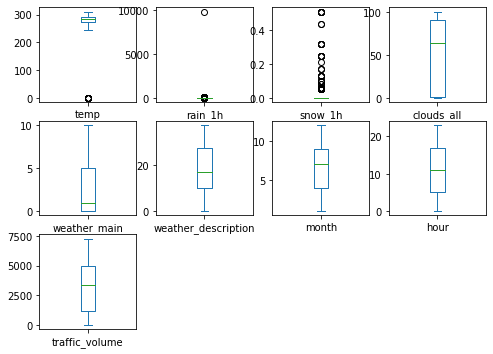

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(8,8))
plt.show()
# ящик с усами 2 вершины не ловит

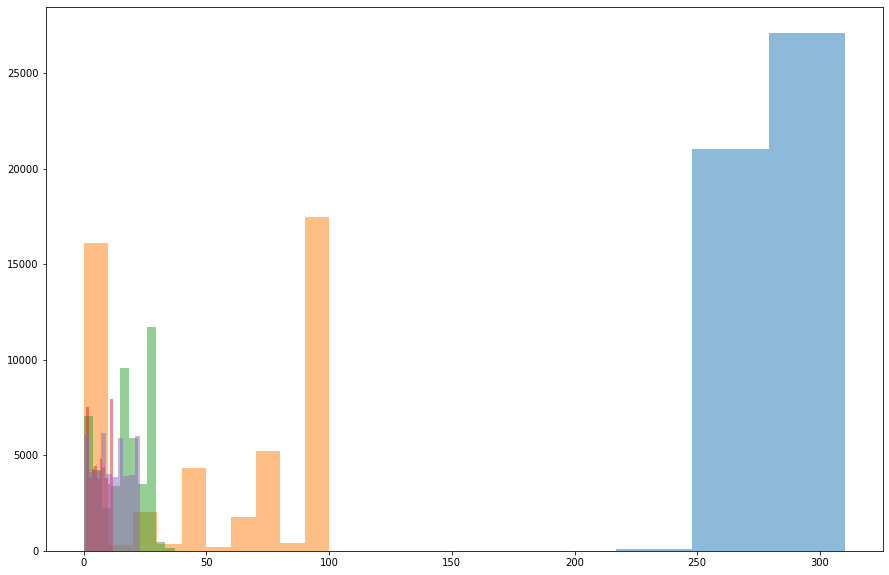

In [ ]:
plt.figure(figsize=(15,10))

plt.hist(df['temp'], alpha = 0.5, label='b')
plt.hist(df['clouds_all'], alpha = 0.5, label='b')
#plt.hist(df['holiday'], alpha = 0.5, label='b')
plt.hist(df['weather_description'], alpha = 0.5, label='b')
plt.hist(df['month'], alpha = 0.5, label='b')
plt.hist(df['hour'], alpha = 0.5, label='b')

plt.show()

In [ ]:
df.drop('holiday',axis=1,inplace=True)

In [ ]:
df.sample(5)

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,month,hour,traffic_volume,date_time
328,277.91,0.0,0.0,1,0,27,10,3,354,2012-10-16 03:00:00
19511,282.35,0.0,0.0,90,5,17,11,17,5743,2015-11-16 17:00:00
30212,272.75,0.0,0.0,1,3,5,1,3,486,2017-01-19 03:00:00
5716,280.27,0.0,0.0,1,0,27,5,15,6084,2013-05-03 15:00:00
34811,286.22,0.0,0.0,1,0,27,6,0,1751,2017-06-25 00:00:00


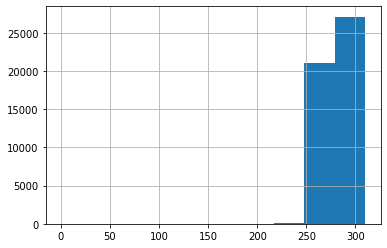

In [ ]:
df.temp.hist()

___________________________________________________

# **Ищем пределы за которыми выбросы**

# **НАЧАЛО**

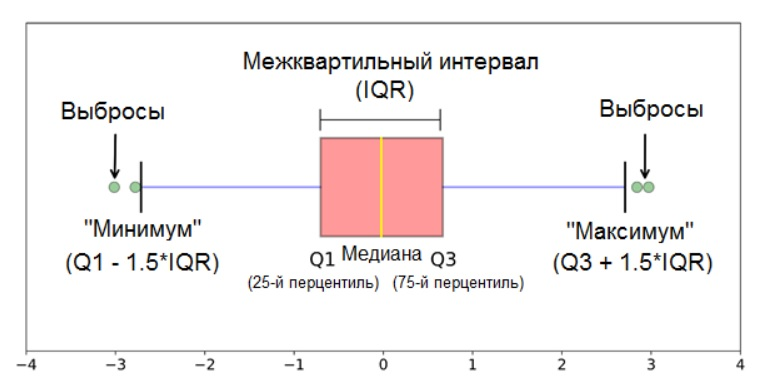

In [ ]:
i = df.temp.quantile(0.25)
i

272.16

In [ ]:
j = df.temp.quantile(0.75)
j

291.806

In [ ]:
(j-i)*1.5

29.468999999999937

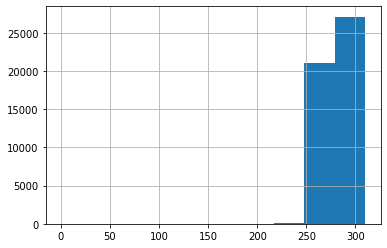

In [ ]:
df.temp.hist()

In [ ]:
d = df[(df.temp > i) & (df.temp < j)]

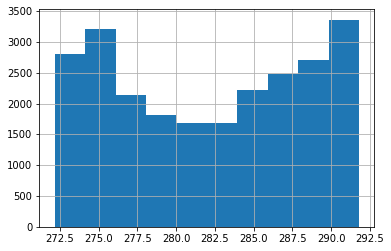

In [ ]:
d.temp.hist()

In [ ]:
df = df[(df.temp > i-(j-i)*1.5) & (df.temp < j+(j-i)*1.5)]

In [ ]:
df.shape

(48204, 11)

In [ ]:
df.shape

(48194, 10)

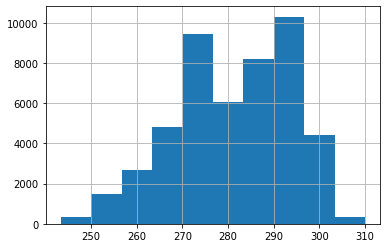

In [ ]:
df.temp.hist()

# **КОНЕЦ**

___________________________________________________________

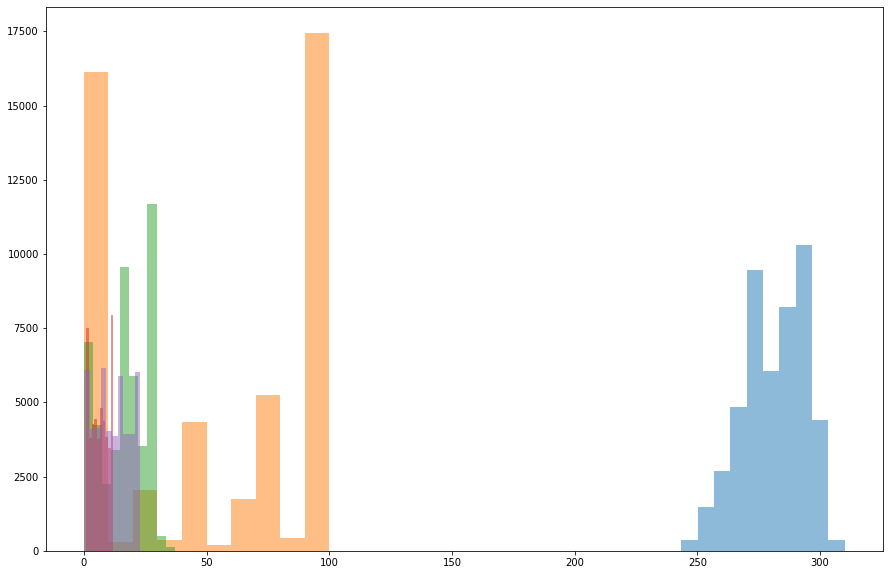

In [ ]:
plt.figure(figsize=(15,10))

plt.hist(df['temp'], alpha = 0.5, label='b')
plt.hist(df['clouds_all'], alpha = 0.5, label='b')
#plt.hist(df['holiday'], alpha = 0.5, label='b')
plt.hist(df['weather_description'], alpha = 0.5, label='b')
plt.hist(df['month'], alpha = 0.5, label='b')
plt.hist(df['hour'], alpha = 0.5, label='b')

plt.show()

In [ ]:
df.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,month,hour,traffic_volume,date_time
0,288.28,0.0,0.0,40,1,24,10,9,5545,2012-10-02 09:00:00
1,289.36,0.0,0.0,75,1,2,10,10,4516,2012-10-02 10:00:00
2,289.58,0.0,0.0,90,1,19,10,11,4767,2012-10-02 11:00:00
3,290.13,0.0,0.0,90,1,19,10,12,5026,2012-10-02 12:00:00
4,291.14,0.0,0.0,75,1,2,10,13,4918,2012-10-02 13:00:00


In [ ]:
df.rain_1h.value_counts()

0.00    44727
0.25      948
0.51      256
1.02      123
0.30      121
        ...  
1.28        1
1.47        1
4.66        1
2.08        1
2.35        1
Name: rain_1h, Length: 372, dtype: int64

In [ ]:
df.snow_1h	.value_counts()

0.00    48131
0.05       14
0.06       12
0.51        6
0.25        6
0.13        6
0.10        6
0.32        5
0.17        3
0.44        2
0.08        2
0.21        1
Name: snow_1h, dtype: int64

In [ ]:
df.drop(['rain_1h','snow_1h'],axis=1,inplace=True)

In [ ]:
df.sample(10)

,temp,clouds_all,weather_main,weather_description,month,hour,traffic_volume,date_time
46585,292.68,1,5,17,8,2,374,2018-08-10 02:00:00
36888,290.68,1,0,27,9,6,1128,2017-09-04 06:00:00
9682,270.50,20,5,17,11,3,346,2013-11-07 03:00:00
4774,267.64,1,0,27,4,8,6410,2013-04-04 08:00:00
20509,273.67,90,8,16,1,15,5548,2016-01-08 15:00:00
37797,286.44,90,2,11,10,17,5655,2017-10-06 17:00:00
38328,281.15,1,0,27,10,2,268,2017-10-26 02:00:00
34320,285.09,1,0,27,6,6,5395,2017-06-07 06:00:00
37368,304.15,1,0,27,9,14,5481,2017-09-22 14:00:00
35816,291.37,1,0,27,7,3,372,2017-07-31 03:00:00


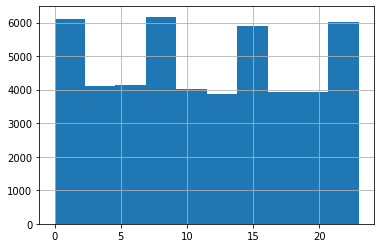

In [ ]:
df.hour.hist()

In [ ]:
df.shape

(48194, 8)

In [ ]:
df.clouds_all.value_counts()

In [ ]:
df.tail(6)

,temp,clouds_all,weather_main,weather_description,month,hour,traffic_volume,date_time
48198,284.20,75,6,13,9,18,3947,2018-09-30 18:00:00
48199,283.45,75,1,2,9,19,3543,2018-09-30 19:00:00
48200,282.76,90,1,19,9,20,2781,2018-09-30 20:00:00
48201,282.73,90,10,21,9,21,2159,2018-09-30 21:00:00
48202,282.09,90,1,19,9,22,1450,2018-09-30 22:00:00
48203,282.12,90,1,19,9,23,954,2018-09-30 23:00:00


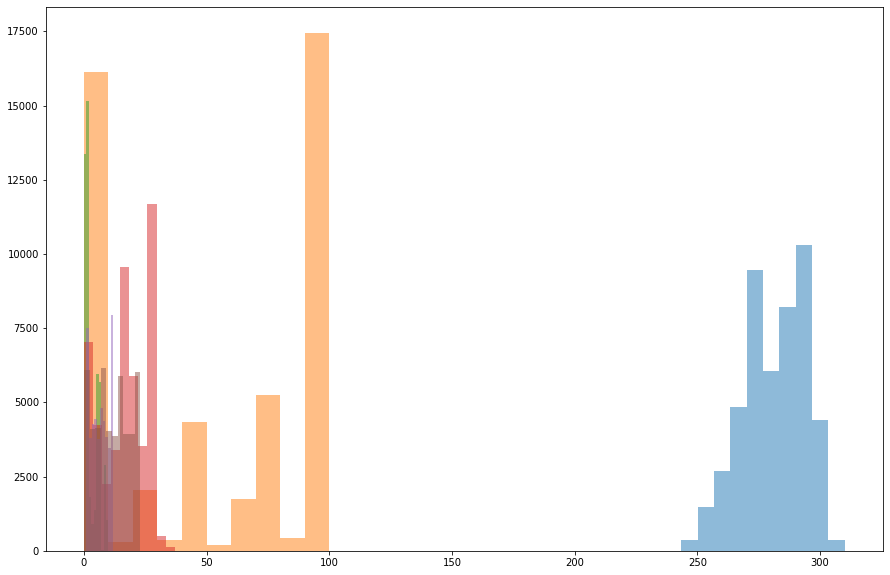

In [ ]:
plt.figure(figsize=(15,10))

plt.hist(df['temp'], alpha = 0.5, label='temp')
plt.hist(df['clouds_all'], alpha = 0.5, label='clouds_all')
plt.hist(df['weather_main'], alpha = 0.5, label='weather_main')
plt.hist(df['weather_description'], alpha = 0.5, label='weather_description')
plt.hist(df['month'], alpha = 0.5, label='month')
plt.hist(df['hour'], alpha = 0.5, label='hour')

plt.show()

In [ ]:
df.to_csv('metro_tr_очищен2.csv')